### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

In [1]:
import shutil

filename = "CornDiseaseDataset.zip"
 
# Target directory
extract_dir = "CornDiseaseDataset"
 
# Format of archive file
archive_format = "zip"
 
# Unpack the archive file
shutil.unpack_archive(filename, extract_dir, archive_format)
print("Archive file unpacked successfully.")

Archive file unpacked successfully.


In [3]:
train_dir = 'Tensorflow_Dataset/Tensorflow_Dataset/Train'
validation_dir = 'Tensorflow_Dataset/Tensorflow_Dataset/Validation'

In [3]:
os.system("rm -rf CornDiseaseDataset/CornDiseaseDataset/Train/.ipynb_checkpoints")
os.system("rm -rf CornDiseaseDataset/CornDiseaseDataset/Validation/.ipynb_checkpoints")

0

In [5]:
BATCH_SIZE = 16
IMG_SIZE = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            labels='inferred',
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 labels='inferred',
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1829 files belonging to 4 classes.
Found 347 files belonging to 4 classes.


In [6]:
class_names = train_dataset.class_names
print(class_names)

['Blight', 'Healthy', 'Rust', 'Spot']


In [7]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of train batches: %d' % tf.data.experimental.cardinality(train_dataset))

Number of validation batches: 22
Number of train batches: 115


In [8]:
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.EfficientNetV2B2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [9]:
base_model.trainable = False

In [10]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(16),
  tf.keras.layers.Dense(4, activation='softmax')])

In [11]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Function  (None, 7, 7, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                90176     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 4)                 6

In [13]:
loss0, accuracy0 = model.evaluate(validation_dataset)

22/22 [==============================] - 15s 537ms/step - loss: 1.4103 - accuracy: 0.3112


In [14]:
start = time.time()
initial_epochs = 10

history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset,
                    verbose = 1)
end = time.time()
print(f"time elapsed: {round((end-start)/60, 2)} minutes")

Epoch 1/10
115/115 [==============================] - 91s 731ms/step - loss: 0.5434 - accuracy: 0.8103 - val_loss: 0.2733 - val_accuracy: 0.8963
Epoch 2/10
115/115 [==============================] - 78s 684ms/step - loss: 0.2254 - accuracy: 0.9328 - val_loss: 0.1824 - val_accuracy: 0.9222
Epoch 3/10
115/115 [==============================] - 79s 689ms/step - loss: 0.1651 - accuracy: 0.9497 - val_loss: 0.1420 - val_accuracy: 0.9308
Epoch 4/10
115/115 [==============================] - 79s 684ms/step - loss: 0.1380 - accuracy: 0.9481 - val_loss: 0.1186 - val_accuracy: 0.9568
Epoch 5/10
115/115 [==============================] - 79s 687ms/step - loss: 0.1158 - accuracy: 0.9601 - val_loss: 0.1045 - val_accuracy: 0.9625
Epoch 6/10
115/115 [==============================] - 79s 687ms/step - loss: 0.1034 - accuracy: 0.9634 - val_loss: 0.0971 - val_accuracy: 0.9654
Epoch 7/10
115/115 [==============================] - 79s 683ms/step - loss: 0.0974 - accuracy: 0.9639 - val_loss: 0.0928 - val_ac

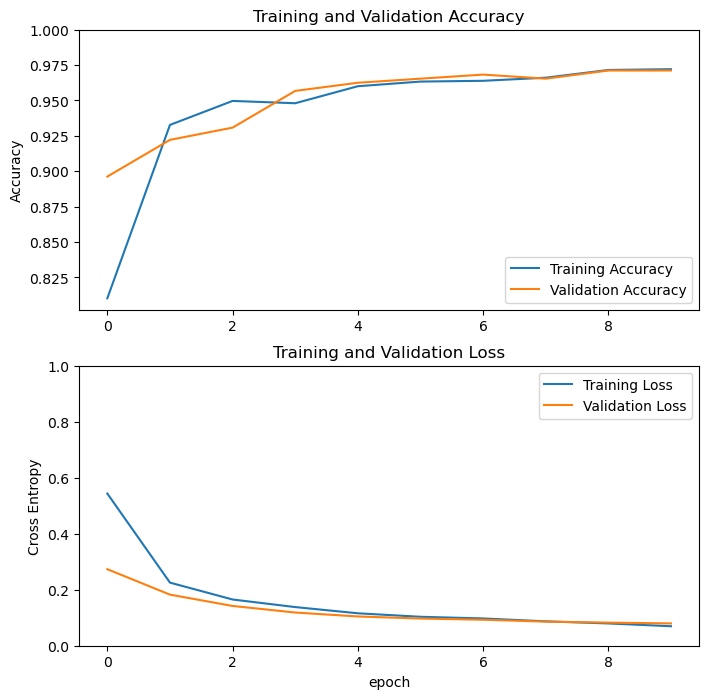

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [16]:
base_model.trainable = True

In [18]:
print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 280

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  327


In [19]:
final_learning_rate = 0.00001 #10x menor que o inicial
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=final_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Function  (None, 7, 7, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                90176     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 4)                 6

In [21]:
start = time.time()
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

end = time.time()
print(f"time elased: {round((end-start)/60, 2)} minutes")

Epoch 10/20
115/115 [==============================] - 97s 773ms/step - loss: 0.1331 - accuracy: 0.9552 - val_loss: 0.1019 - val_accuracy: 0.9741
Epoch 11/20
115/115 [==============================] - 86s 749ms/step - loss: 0.1191 - accuracy: 0.9617 - val_loss: 0.0921 - val_accuracy: 0.9712
Epoch 12/20
115/115 [==============================] - 88s 764ms/step - loss: 0.0959 - accuracy: 0.9721 - val_loss: 0.0852 - val_accuracy: 0.9769
Epoch 13/20
115/115 [==============================] - 88s 763ms/step - loss: 0.0880 - accuracy: 0.9754 - val_loss: 0.0841 - val_accuracy: 0.9741
Epoch 14/20
115/115 [==============================] - 88s 762ms/step - loss: 0.0826 - accuracy: 0.9748 - val_loss: 0.0745 - val_accuracy: 0.9769
Epoch 15/20
115/115 [==============================] - 88s 766ms/step - loss: 0.0701 - accuracy: 0.9820 - val_loss: 0.0792 - val_accuracy: 0.9741
Epoch 16/20
115/115 [==============================] - 87s 762ms/step - loss: 0.0711 - accuracy: 0.9798 - val_loss: 0.0764 -

In [62]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

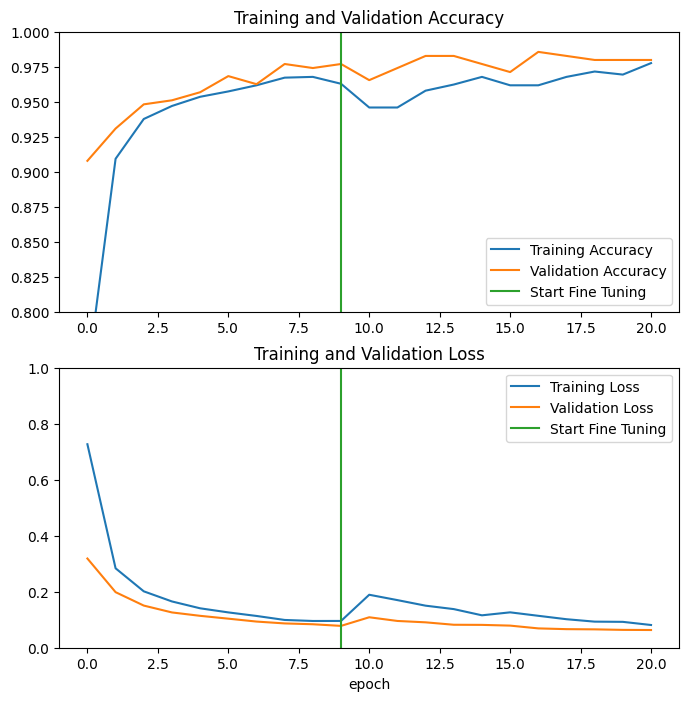

In [63]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [64]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 10)

In [65]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)
print('Test loss :', loss)

2/2 [==============================] - 1s 363ms/step - loss: 0.0602 - accuracy: 0.9688
Test accuracy : 0.96875
Test loss : 0.06023970991373062
